In [1]:
import sklearn
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
data = pd.read_csv('Food_Delivery_Times.csv')

# Pre-Processing on the Data

In [4]:
data.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [5]:
data.shape

(1000, 9)

In [6]:
data.tail()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55
999,103,6.63,Foggy,Low,Night,Scooter,24,3.0,58


In [7]:
data.sample()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
156,310,5.78,Foggy,Low,Afternoon,Scooter,9,9.0,33


In [8]:
data.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [9]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


We have 10 objects in the dataset

In [11]:
data.isnull().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

No Null Rows

In [13]:
data.shape

(1000, 9)

In [14]:
data.drop_duplicates(inplace=True)
data.shape

(1000, 9)

No Duplicates

# Identifying and Removing the outliers

<Axes: ylabel='Delivery_Time_min'>

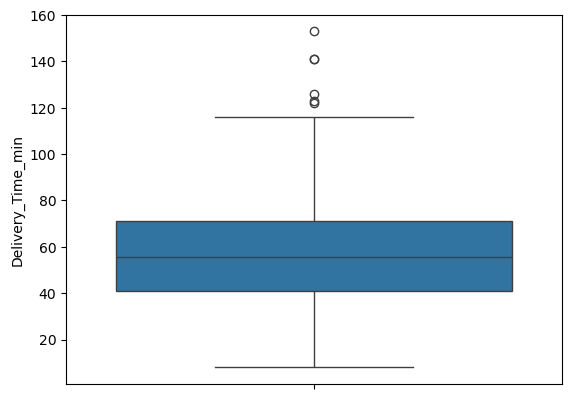

In [17]:
sns.boxplot(data['Delivery_Time_min'])

In [18]:
sorted(data['Delivery_Time_min'],reverse=True)

[153,
 141,
 141,
 126,
 123,
 122,
 116,
 116,
 115,
 114,
 113,
 112,
 112,
 111,
 111,
 109,
 109,
 108,
 108,
 108,
 108,
 106,
 106,
 105,
 105,
 105,
 104,
 104,
 103,
 102,
 101,
 101,
 101,
 101,
 100,
 100,
 100,
 100,
 99,
 98,
 98,
 98,
 98,
 97,
 97,
 97,
 96,
 96,
 96,
 95,
 95,
 95,
 94,
 94,
 94,
 94,
 94,
 93,
 93,
 93,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 92,
 91,
 91,
 91,
 91,
 91,
 91,
 91,
 90,
 90,
 90,
 90,
 90,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 88,
 88,
 88,
 88,
 88,
 87,
 87,
 87,
 87,
 87,
 87,
 86,
 86,
 86,
 86,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 84,
 84,
 84,
 84,
 84,
 84,
 83,
 83,
 83,
 83,
 83,
 83,
 82,
 82,
 82,
 81,
 81,
 81,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 80,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 79,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 78,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 77,
 76,
 76,
 76,
 76,
 76,
 76,
 76,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 75,
 7

In [19]:
data = data[~((data['Delivery_Time_min'] >= 141) & (data['Delivery_Time_min'] <= 153))]

<Axes: ylabel='Delivery_Time_min'>

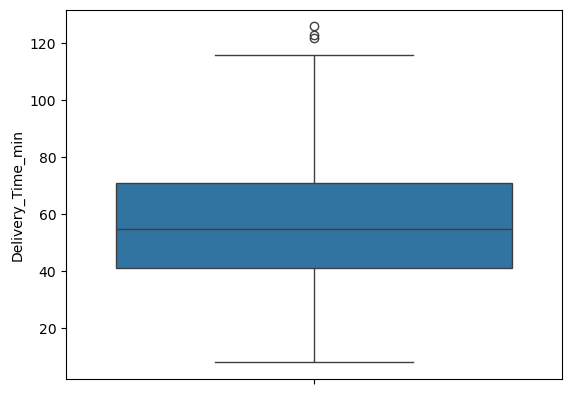

In [20]:
sns.boxplot(data['Delivery_Time_min'])

In [21]:
data.shape

(997, 9)

Outliers have been removed

# Normalization

In [24]:
from sklearn.preprocessing import MinMaxScaler
num = data.select_dtypes(include=[np.number])
non_num = data.select_dtypes(exclude=[np.number])
scaler = MinMaxScaler()
scaled_num = pd.DataFrame(scaler.fit_transform(num), columns=num.columns)
final_data = pd.concat([scaled_num, non_num.reset_index(drop=True)], axis=1)
print("Shape:", final_data.shape)
final_data.head()

Shape: (997, 9)


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
0,0.521522,0.378351,0.291667,0.111111,0.296610,Windy,Low,Afternoon,Scooter
1,0.737738,0.815979,0.625000,0.222222,0.644068,Clear,Medium,Evening,Bike
2,0.740741,0.460309,0.958333,0.111111,0.432203,Foggy,Low,Night,Scooter
3,0.660661,0.353093,0.000000,0.111111,0.245763,Rainy,Medium,Afternoon,Scooter
4,0.411411,0.950515,0.458333,0.555556,0.508475,Clear,Low,Morning,Bike


# Standardization

In [26]:
from sklearn.preprocessing import StandardScaler
numeric = data.select_dtypes(include=[np.number])
non_numeric = data.select_dtypes(exclude=[np.number])
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric)
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric.columns)
final_data = pd.concat([scaled_numeric_df, non_numeric.reset_index(drop=True)], axis=1)
print("Shape of the final dataset:", final_data.shape)
final_data.head()

Shape of the final dataset: (997, 9)


,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather,Traffic_Level,Time_of_Day,Vehicle_Type
0,0.074946,-0.370537,-0.689061,-1.229594,-0.624831,Windy,Low,Afternoon,Scooter
1,0.822575,1.122506,0.422579,-0.886542,1.277539,Clear,Medium,Evening,Bike
2,0.832958,-0.090921,1.534219,-1.229594,0.117557,Foggy,Low,Night,Scooter
3,0.556059,-0.456708,-1.661746,-1.229594,-0.903227,Rainy,Medium,Afternoon,Scooter
4,-0.305791,1.581499,-0.133241,0.142613,0.535151,Clear,Low,Morning,Bike
